In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-komputer-if3170/data_train.csv
/kaggle/input/data-komputer-if3170/data_validation.csv
/kaggle/input/data-komputer-if3170/test.csv


# Setup

In [2]:
train_df = pd.read_csv("/kaggle/input/data-komputer-if3170/data_train.csv")
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3


In [3]:
validation_df = pd.read_csv("/kaggle/input/data-komputer-if3170/data_validation.csv")
validation_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
2,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
3,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
4,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1
596,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
597,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
598,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2


In [4]:
test_df = pd.read_csv("/kaggle/input/data-komputer-if3170/test.csv")
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1076,1,2.2,0,3,1,53,0.1,114,...,6,127,1314,1003,16,9,10,1,0,0
1,1,1310,0,2.4,0,0,0,40,0.5,118,...,0,1499,1687,3348,9,2,13,0,0,1
2,2,1915,0,1.1,0,6,0,30,0.6,181,...,8,266,1754,3815,13,4,7,0,0,0
3,3,587,0,1.4,0,9,1,8,0.5,142,...,13,128,593,3182,9,7,10,1,0,0
4,4,1526,0,1.8,0,5,1,11,0.1,131,...,7,150,1606,706,18,7,18,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1841,0,0.9,0,0,1,13,0.6,112,...,3,1311,1679,1645,15,9,12,1,1,1
1996,1996,1064,1,1.8,1,0,0,12,0.3,147,...,5,105,717,1509,16,10,14,0,0,0
1997,1997,1448,0,1.4,1,0,0,22,0.2,142,...,5,345,652,3807,11,7,9,0,0,0
1998,1998,1085,0,2.4,0,3,1,38,0.7,116,...,8,121,905,885,18,4,8,1,0,0


In [5]:
non_numeric_columns = ["blue", "wifi", "touch_screen", "three_g", "four_g", "dual_sim"]
drop_col = non_numeric_columns.copy()
drop_col.append("price_range")
numeric_columns = train_df.drop(drop_col, axis=1).columns.tolist()

numeric_columns.remove("fc")

# Data Preprocessing
Dari analisis EDA yang dilakukan akan dilakukan data preprocessing untuk melakukan pelatihan model

## Removing Outliers

Remove outliers using IQR

In [6]:
class OutlierRemoval(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
        
    def fit(self, X, y = None):
        q3 = X['fc'].quantile(q=0.75)
        q1 = X['fc'].quantile(q=0.25)
        self.IQR = q3-q1
        self.lower_bound = q1 - 1.5 * self.IQR
        self.upper_bound = q3 + 1.5 * self.IQR
        return self
    
    def transform(self, X):
        X_ = X[(X.loc[:,"fc"] >= self.lower_bound) & (X.loc[:,"fc"]<=self.upper_bound)]
        return X_

## Invalid Data Filling

Invalid data will be filled with median using interpolation

In [7]:
class InvalidReplacement(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        self.median = X['sc_w'].median()
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_['sc_w'] = X_['sc_w'].replace(0, self.median)
        return X_

## Feature Selection
Remove fc column because it correlates the highest with pc

In [8]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.drop(columns = self.column)
        return X_

## Scaling and Normalizing
Scale values of numeric columns minus column`fc`

In [9]:
numericTransformation = ColumnTransformer(
    transformers = [
        ('scaling', MinMaxScaler(), numeric_columns)
#         ('normalizing', Normalizer(), numeric_columns)
    ],
    remainder = 'passthrough'
)

## Pipeline
Pipeline for all preprocessing

In [10]:
pipeline = Pipeline([
    ('removing outliers', OutlierRemoval()),
    ('invalid data replacement', InvalidReplacement()),
    ('feature selection', DropColumn(['fc'] + non_numeric_columns))
])

full_pipeline = Pipeline([
    ('preprocessor', pipeline),
#     ('scaling', numericTransformation)
])

# transformed_column_names = numeric_columns + ['price_range']
processed_data = full_pipeline.fit_transform(train_df)
print(processed_data.shape)
processed_df = processed_data
# processed_df = pd.DataFrame(processed_data, columns = transformed_column_names)
# processed_df

(1389, 14)


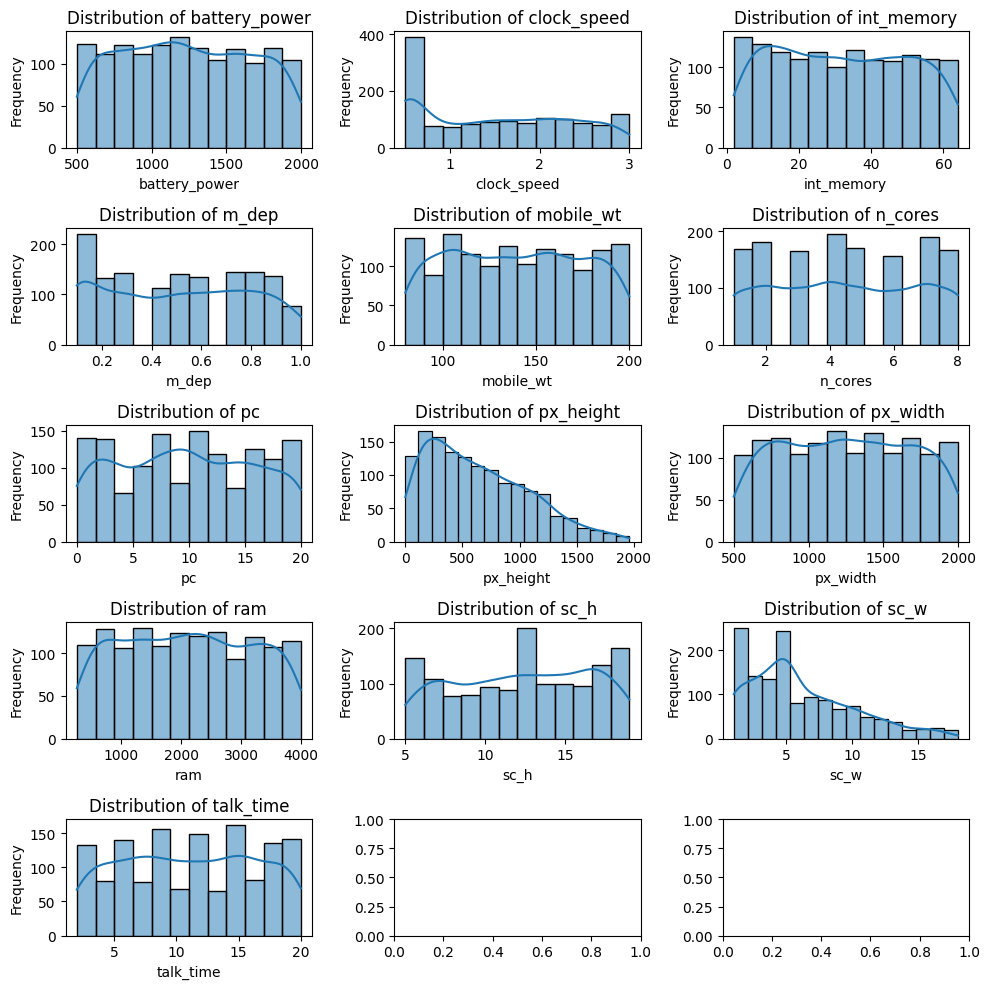

In [11]:
fig, ax = plt.subplots(5, 3, figsize = (10,10))

for i, col in enumerate(numeric_columns):
    r = i // 3
    c = i % 3
    
    sns.histplot(kde=True,data=processed_df[col], ax=ax[r,c])    
    ax[r, c].set_title(f'Distribution of {col}')
    ax[r, c].set_xlabel(col)
    ax[r, c].set_ylabel("Frequency")
    
plt.tight_layout()
plt.show()

# Modelling

In [12]:
target_column = processed_df['price_range']
feature_column = processed_df.drop(columns=['price_range'])
feature_column

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,804,0.8,41,0.9,89,1,13,709,818,2027,11,5,11
1,1042,2.2,11,0.6,139,5,16,68,1018,2826,18,5,2
2,1481,2.0,35,0.5,105,3,0,249,522,2635,17,16,4
3,1104,1.7,60,0.4,199,2,13,653,1413,1229,6,5,3
4,652,0.5,58,0.6,142,3,2,464,781,565,18,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1.4,53,0.7,135,3,0,547,705,1211,15,10,7
1396,1097,0.8,21,0.1,160,7,15,1277,1352,2219,15,6,12
1397,1179,0.5,32,0.3,182,2,12,85,1451,340,16,5,16
1398,719,0.5,23,0.4,113,6,9,431,1727,3990,14,9,12


In [13]:
# scaling_test = numericTransformation.fit_transform(validation_df.drop(columns="fc"))

# transformed_column_names = numeric_columns + [col for col in train_df.columns if col not in numeric_columns and col != 'fc']

# scaled_test = pd.DataFrame(scaling_test, columns = transformed_column_names)

scaled_test = DropColumn(['fc'] + non_numeric_columns).fit_transform(validation_df)
y_test = scaled_test['price_range']
X_test = scaled_test.drop(columns=["price_range"])
X_test

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,7,0.6,188,2,2,20,756,2549,9,7,19
1,563,0.5,41,0.9,145,5,6,1263,1716,2603,11,2,9
2,769,2.9,9,0.1,182,5,1,248,874,3946,5,2,7
3,775,1.0,46,0.7,159,2,16,862,1864,568,17,15,11
4,595,0.9,23,0.1,121,3,17,441,810,3752,10,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1547,2.9,57,0.4,114,1,3,347,957,1620,9,2,19
596,1882,2.0,44,0.8,113,8,19,4,743,3579,19,8,20
597,674,2.9,21,0.2,198,3,4,576,1809,1180,6,3,4
598,1965,2.6,39,0.2,187,4,3,915,1965,2032,11,10,16


In [14]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Using KNN by melihatA

### Modelling

In [15]:
from collections import Counter

def euclidean_distance(p1,p2):
    p1_numeric = np.array(p1, dtype=float)
    p2_numeric = np.array(p2, dtype=float)
    return np.sqrt(np.sum((p1_numeric - p2_numeric) ** 2))

class KNN():
    def __init__(self, k=3, dist=1):
        self.k = k
        self.dist = dist
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        result = [self.predict_el(x) for x in X]
        return result
    
    def predict_el(self, x):
        if (self.dist == 1):
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        else : 
            # other distance e.g. : Manhattan
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [16]:
# for i in range (1,10,2):
knn = KNN(k=5)
knn.fit(feature_column.to_numpy(), target_column.to_numpy())
y_pred_knn = knn.predict(X_test.to_numpy())
acc = np.sum(y_test == y_pred_knn)/len(y_test)

In [17]:
acc = np.sum(y_test == y_pred_knn)/len(y_test)
print(f"Accuracy Percentage {np.round(acc*100,2)}")

Accuracy Percentage 92.83


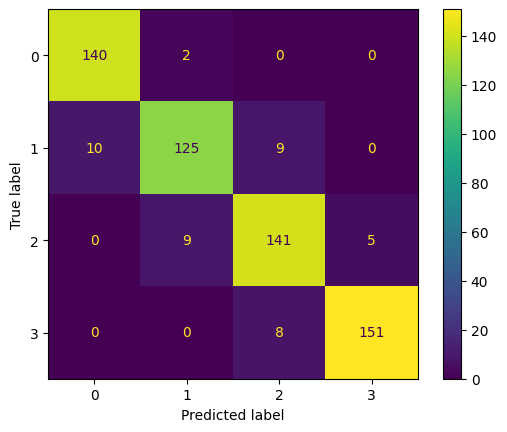

In [18]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(knn_cm)
disp.plot()
plt.show()

In [19]:
joblib.dump(knn, "/kaggle/working/knn.pkl")

['/kaggle/working/knn.pkl']

## Using Scikit KNN

### Model

In [20]:
scikit_knn = KNeighborsClassifier(n_neighbors = 5)
scikit_knn.fit(feature_column, target_column)

KNeighborsClassifier()

### Prediction

In [21]:
y_pred = scikit_knn.predict(X_test)
y_pred

array([1, 2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 2, 3, 0, 3, 0, 2, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 3, 1, 0, 3, 1, 3, 3, 0, 2, 3, 1, 3, 1, 1, 1, 2, 0, 2,
       3, 1, 1, 2, 2, 3, 1, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2,
       3, 2, 3, 3, 2, 3, 1, 0, 1, 2, 0, 3, 1, 0, 3, 3, 0, 2, 3, 1, 3, 3,
       0, 2, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 2, 3, 1, 0, 2, 1, 3, 1, 2, 2, 3, 2, 0, 2, 2, 1, 3, 3, 1,
       0, 0, 3, 0, 0, 2, 3, 0, 2, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 0, 0, 2,
       1, 1, 2, 0, 0, 3, 3, 3, 0, 2, 3, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1,
       3, 1, 2, 0, 3, 1, 1, 2, 0, 2, 0, 3, 2, 0, 3, 2, 1, 0, 2, 0, 1, 3,
       3, 1, 1, 2, 2, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 0, 0, 2,
       2, 1, 3, 3, 0, 2, 0, 3, 0, 2, 2, 2, 2, 2, 3, 0, 2, 3, 3, 3, 0, 0,
       1, 0, 3, 3, 1, 1, 0, 2, 2, 1, 3, 3, 0, 2, 2, 0, 0, 1, 0, 3, 2, 3,
       3, 0, 1, 3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 3, 1, 3, 0, 1, 0, 1, 3, 3, 3, 0, 3, 1,

### Evaluation

In [22]:
knn_mse = mean_squared_error(y_test, y_pred)
knn_mse = np.sqrt(knn_mse) 
knn_mse

0.26770630673681683

In [23]:
knn_scores = cross_val_score(scikit_knn, feature_column, target_column, scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)

Scores: [0.33927557 0.31736324 0.25445668 0.35985609 0.25445668 0.31736324
 0.26822089 0.31736324 0.25445668 0.24077171]
Mean: 0.2923584003725935
Standard deviation: 0.04023221606661346


In [24]:
acc = np.sum(y_test == y_pred)/len(y_test)
print(f"Accuracy Percentage {np.round(acc*100,2)}")

Accuracy Percentage 92.83


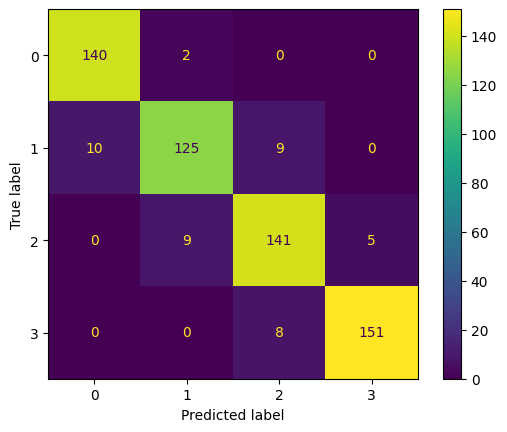

In [25]:
knn_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(knn_cm)
disp.plot()
plt.show()

### Saving Model

In [26]:
joblib.dump(scikit_knn, "/kaggle/working/scikit_knn.pkl")

['/kaggle/working/scikit_knn.pkl']

## Using Scikit Naive Bayes

### Model

In [27]:
scikit_nb = GaussianNB()
scikit_nb.fit(feature_column, target_column)

GaussianNB()

### Prediction

In [28]:
y_pred_nb = scikit_nb.predict(X_test)
y_pred_nb

array([2, 2, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 0, 2, 3, 1,
       0, 1, 1, 1, 2, 2, 0, 2, 2, 3, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 2, 1, 3, 2, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2,
       2, 2, 2, 3, 2, 3, 1, 0, 1, 2, 0, 3, 1, 0, 3, 3, 0, 2, 3, 1, 3, 3,
       0, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 3, 1, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 3, 2, 0, 3, 1, 3, 1, 2, 2, 3, 3, 1, 2, 2, 1, 3, 3, 1,
       0, 0, 3, 0, 0, 1, 3, 0, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 0, 2,
       1, 0, 3, 0, 0, 3, 3, 3, 0, 2, 3, 0, 0, 1, 0, 2, 3, 1, 0, 1, 1, 1,
       3, 0, 2, 0, 3, 1, 1, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 1, 2, 0, 1, 3,
       3, 1, 2, 2, 2, 3, 2, 3, 3, 3, 0, 2, 0, 2, 3, 1, 2, 3, 2, 0, 0, 2,
       2, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 2, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0,
       1, 1, 3, 3, 1, 2, 0, 2, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 2, 2, 3,
       3, 0, 1, 3, 3, 0, 0, 2, 1, 1, 1, 0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 1, 3, 0, 3, 0, 1, 0, 1, 3, 2, 2, 0, 2, 1,

### Evaluation

In [29]:
nb_mse = mean_squared_error(y_test, y_pred_nb)
nb_mse = np.sqrt(nb_mse) 
nb_mse

0.45643546458763845

In [30]:
nb_scores = cross_val_score(scikit_nb, feature_column, target_column, scoring="neg_mean_squared_error", cv=10)
nb_rmse_scores = np.sqrt(-nb_scores)
display_scores(nb_rmse_scores)

Scores: [0.40677712 0.36971698 0.46457221 0.44881939 0.50179534 0.45676372
 0.40677712 0.44881939 0.42409446 0.43405737]
Mean: 0.43621931094771177
Standard deviation: 0.034859187742194396


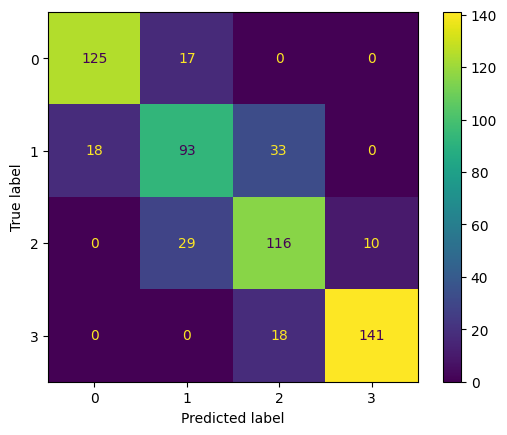

In [31]:
nb_cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(nb_cm)
disp.plot()
plt.show()

In [32]:
acc = np.sum(y_test == y_pred_nb)/len(y_test)
print(f"Accuracy Percentage {np.round(acc*100,2)}")

Accuracy Percentage 79.17


### Saving Model

In [33]:
joblib.dump(scikit_nb, "/kaggle/working/scikit_naive_bayes.pkl")

['/kaggle/working/scikit_naive_bayes.pkl']

# Submission

In [34]:
scaled_test = DropColumn(['fc'] + non_numeric_columns).fit_transform(test_df)
id_test = scaled_test['id']
X_test = scaled_test.drop(columns=["id"])
X_test

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1076,2.2,53,0.1,114,6,6,127,1314,1003,16,9,10
1,1310,2.4,40,0.5,118,5,0,1499,1687,3348,9,2,13
2,1915,1.1,30,0.6,181,3,8,266,1754,3815,13,4,7
3,587,1.4,8,0.5,142,7,13,128,593,3182,9,7,10
4,1526,1.8,11,0.1,131,1,7,150,1606,706,18,7,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1841,0.9,13,0.6,112,5,3,1311,1679,1645,15,9,12
1996,1064,1.8,12,0.3,147,2,5,105,717,1509,16,10,14
1997,1448,1.4,22,0.2,142,6,5,345,652,3807,11,7,9
1998,1085,2.4,38,0.7,116,6,8,121,905,885,18,4,8


In [35]:
y_submit = knn.predict(X_test.to_numpy())
y_submit

[0,
 3,
 3,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 3,
 0,
 0,
 2,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 3,
 0,
 2,
 2,
 3,
 2,
 3,
 1,
 0,
 0,
 3,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 0,
 3,
 3,
 3,
 2,
 0,
 3,
 2,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 3,
 1,
 2,
 0,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 3,
 0,
 3,
 0,
 1,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 2,
 0,
 3,
 2,
 2,
 1,
 3,
 3,
 1,
 2,
 0,
 3,
 3,
 2,
 1,
 0,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 0,
 3,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,


In [36]:
y_submit_df =  pd.DataFrame(y_submit, columns=["price_range"])
submit = pd.concat([id_test, y_submit_df], axis = 1)
submit

,id,price_range
0,0,0
1,1,3
2,2,3
3,3,2
4,4,0
...,...,...
1995,1995,2
1996,1996,0
1997,1997,3
1998,1998,0


In [37]:
submit.to_csv('/kaggle/working/submisi_melihatA_12112023_0029.csv', index = False)